# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [210]:
# Import the appropriate libraries with aliases
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib as plt # although this worked in the past, I had to reimport it later differently... not sure why

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [178]:
#Code Used:
north_df.head()
# there are 9

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [179]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [180]:
print(north_df['Rep ID'].unique())
len(north_df['Rep ID'].unique())

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']


9

#### EDA Question 1B:  How many reps are in the South branch?  

In [181]:
#Code Used:
print(south_df['Rep ID'].unique())
len(south_df['Rep ID'].unique())

# there are 11 reps in the south branch

['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [182]:
#Code Used:

north_df.agg({"Busy Minutes": ['mean'], "Not Ready Minutes": ['mean'], "Incoming Wait Time": ['mean'],
              "During Call Wait Time": ['mean']})

,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
mean,9.987755,1.914286,3.04878,2.967347


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [183]:
#Code Used:
south_df.agg({"Busy Minutes": ['mean'], "Not Ready Minutes": ['mean'], "Incoming Wait Time": ['mean'],
              "During Call Wait Time": ['mean']})


,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
mean,10.05414,1.910828,3.0,3.076433


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [229]:
# Code Used:
print(north_df.groupby('Time Block').size()+south_df.groupby('Time Block').size())


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10




<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

In [185]:
# Code Used
# Add Additional Cells as needed.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [186]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [237]:
north_df.groupby('Incoming or Outgoing').agg({'Incoming Wait Time':['mean', 'min', 'max', 'sum']})
# I couldn't think of a better way to demonstrate this quickly
# it appears there is missing data in 'Incoming Wait Time', but some of those calls are "outgoing" so nan is
# an accurate value there. So there really isn't any data missing that we would have to account for.

Incoming Wait Time                 
                                   mean  min  max    sum
Incoming or Outgoing                                    
Incoming                        3.04878  1.0  5.0  250.0
Outgoing                            NaN  NaN  NaN    0.0

In [188]:

(north_df['Sale'].unique())

array(['NO', 'YES ', 'YES'], dtype=object)

In [189]:
north_df['Sale'] = north_df['Sale'].replace ( ['YES '],'YES')
(north_df['Sale'].unique())

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I used .replace(), and it doesn't make sense to have two different strings that are supposed to mean the same thing, it would mess up data manipulation if you were interested in the sales. 

In [190]:
#Code Used
# Add Additional Cells as needed.


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 

In [191]:
#Code Used
# Add Additional Cells as needed.

duplicate_rows = north_df[north_df.duplicated()]
duplicate_rows

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [192]:
sduplicate_rows = south_df[south_df.duplicated()]
sduplicate_rows

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: It seems like the Calls column is unnecessary, but it's useful later just for data manipulation so I left the column in. It's still possible to complete the analysis without it but it's easier to leave it in. I dropped the unnamed column, it seems like it's supposed to be a call ID thing but it's not useful for this analysis so I dropped it. 

In [193]:
#Code Used
# Add Additional Cells as needed.
print(north_df['Calls'].unique())
(south_df['Calls'].unique())

[1]


array([1], dtype=int64)

In [214]:
north_df = north_df.drop(['Unnamed: 0'], axis = 1)
south_df = south_df.drop(['Unnamed: 0'], axis=1)

In [195]:
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [196]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [197]:
# Create dataframe for the entire company named df
df = pd.merge(north_df, south_df, on = ['Branch', 'Call Purpose', 'Time Block', 
                                   'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call', 'Abandoned',
                                  'Busy Minutes', 'Incoming Wait Time', 'During Call Wait Time',
                                  'Not Ready Minutes', 'Calls'], how = "outer")
df.head(500)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,South,Product Support,1:00 PM,Outgoing,D,Kate,NO,0,0,10,3,NaN,4,1
496,South,Product Support,1:00 PM,Outgoing,C,Susan,NO,0,0,10,3,NaN,3,1
497,South,Product Support,1:00 PM,Outgoing,D,Karl,YES,0,0,11,1,NaN,2,1
498,South,Product Support,1:00 PM,Outgoing,C,Sharon,NO,0,0,8,1,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [198]:
# Code Used
# Add Additional Cells as needed.
df.groupby('Rep ID').agg('sum')

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Alice,0,0,199,46,15.0,58,20
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23
Brent,0,1,362,71,17.0,117,37
Cam,1,0,233,46,32.0,66,24
Duke,2,0,292,56,39.0,85,29
Eric,0,0,361,54,47.0,112,35
George,0,0,298,53,41.0,87,29
Helga,0,2,292,58,36.0,95,31


In [199]:
df.groupby(['Rep ID', 'Branch']).size().sort_values(ascending=False)
# this is how I did the analysis without the calls column at first, so it's doable but maybe easier with 
# the calls column still there

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     33
Sandy   South     32
Helga   South     31
Lilly   North     30
Todd    North     29
Duke    North     29
George  South     29
Kate    South     29
Karl    South     28
Josh    South     26
Susan   South     26
Joe     North     26
Sharon  South     25
Xander  North     24
Cam     North     24
Amanda  North     23
Andy    North     23
Alice   South     20
dtype: int64

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85
- South Branch = 1.27
- Company Wide = 2.06
- Do any of these fall out of the optimal range of 2-5%? No

In [200]:
# Code Used
# Add Additional Cells as needed.
north_df.agg({'Abandoned' : 'mean'})*100

Abandoned    2.857143
dtype: float64

In [201]:
south_df.agg({'Abandoned' : 'mean'})*100

Abandoned    1.273885
dtype: float64

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40% - 33
- South Branch = 38% - 48
- Company Wide = 38.9% - 81

In [202]:
# Code Used
# Add Additional Cells as needed.
print(north_df.groupby('Incoming Wait Time').size())
print(north_df.groupby('Incoming or Outgoing').agg('sum'))


Incoming Wait Time
1.0    17
2.0    16
3.0    12
4.0    20
5.0    17
dtype: int64
                      Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Incoming or Outgoing                                                          
Incoming                      1          3           810                159   
Outgoing                      4          4          1637                310   

                      Incoming Wait Time  During Call Wait Time  Calls  
Incoming or Outgoing                                                    
Incoming                           250.0                    247     82  
Outgoing                             0.0                    480    163  


In [203]:
print(((17+16)/82)*100)

40.243902439024396


In [204]:
print(south_df.groupby('Incoming Wait Time').size())
print(south_df.groupby('Incoming or Outgoing').agg('sum'))

Incoming Wait Time
1.0    20
2.0    28
3.0    29
4.0    30
5.0    19
dtype: int64
                      Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Incoming or Outgoing                                                          
Incoming                      1          1          1259                246   
Outgoing                     10          3          1898                354   

                      Incoming Wait Time  During Call Wait Time  Calls  
Incoming or Outgoing                                                    
Incoming                           378.0                    393    126  
Outgoing                             0.0                    573    188  


In [205]:
print(((20+28)/126)*100)

38.095238095238095


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [206]:
# Code Used 
north_df.groupby('Incoming or Outgoing').agg({'Incoming Wait Time': 'mean'})

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.04878
Outgoing,NaN


In [207]:
south_df.groupby('Incoming or Outgoing').agg({'Incoming Wait Time': 'mean'})

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.0
Outgoing,NaN


In [208]:
df.groupby('Incoming or Outgoing').agg({'Incoming Wait Time': 'mean'})

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.019231
Outgoing,NaN


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
# I chose a bar chart, line charts suggest the passing of time to me so I didn't want to do that kind, and a bar chart is easiest for non-numeric values on one axis

In [215]:
df.groupby('Queue').agg({'Abandoned': 'mean'})

,Abandoned
Queue,
A,0.041667
B,0.020134
C,0.007246
D,0.017045


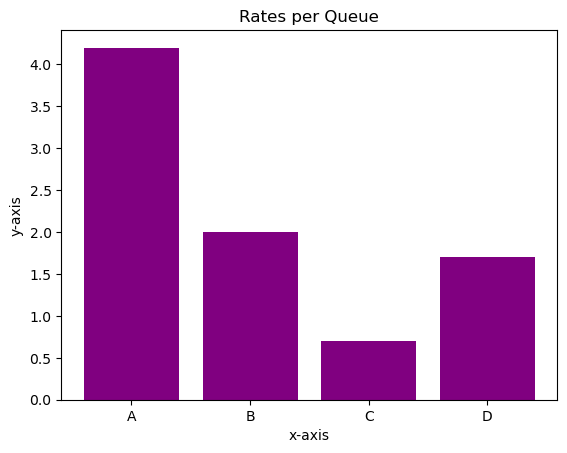

In [225]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
import matplotlib.pyplot as plt

#Your Code Here:

queues = ['A', 'B', 'C', 'D']
rates = [4.2, 2.0, 0.7, 1.7]

# plotting the data
plt.bar(queues, rates, color='purple')

# Adding the title
plt.title("Rates per Queue")
  
# Adding the labels
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()

# I did not understand the provided code, so I tried something that made more sense to me, not sure if it's right
# but I wanted to at least understand it

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [267]:
north_df['Rep ID'].unique()
north_reps_mean = [2.1, 2.9, 3.5, 2.8, 3.6, 3.1, 2.4, 3.6, 3.3]

In [268]:
north_reps = ['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander']

In [269]:
south_df['Rep ID'].unique()


array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

In [270]:
south_reps = ['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon']
south_reps_mean = [3.4, 2.6, 2.9, 2.5, 2.6, 2.9, 2.9, 3.2, 3.3, 3.4, 3.6]

In [271]:
south_pltt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean()
print(south_pltt)

Rep ID
Alice     2.500000
Eric      2.611111
George    3.153846
Helga     3.272727
Josh      3.444444
Karl      2.888889
Kate      3.363636
Randy     2.937500
Sandy     2.615385
Sharon    3.625000
Susan     2.916667
Name: Incoming Wait Time, dtype: float64


In [277]:
north_pltt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean()
service_level_north = [75.0, 45.5, 33.3, 42.9, 20.0, 33.3, 60.0, 30.0, 33.3]
print(north_pltt)



Rep ID
Amanda    2.400000
Andy      3.600000
Brent     2.125000
Cam       2.909091
Duke      2.785714
Joe       3.600000
Lilly     3.083333
Todd      3.500000
Xander    3.333333
Name: Incoming Wait Time, dtype: float64


<BarContainer object of 9 artists>

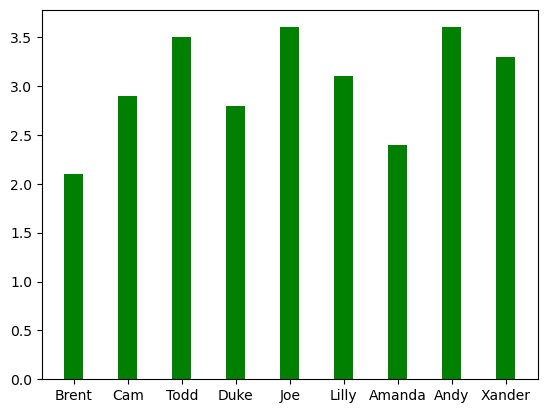

In [297]:
plt.bar(north_reps, north_reps_mean, color = 'green', width = 0.35)

# I tried to label the y axis but it didn't work

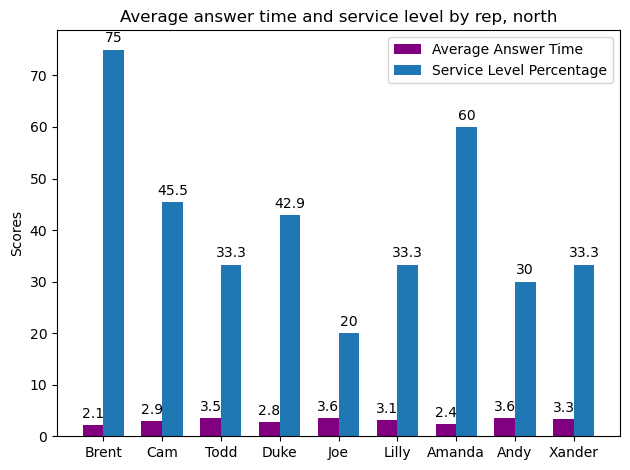

In [295]:

x = np.arange(len(north_reps))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, north_reps_mean, width, label='Average Answer Time', color = 'purple')
rects2 = ax.bar(x + width/2, service_level_north, width, label='Service Level Percentage')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Average answer time and service level by rep, north')
ax.set_xticks(x, north_reps)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# this grouped bar chart is not very useful to look at but I did get it to work... 

In [276]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
north_pltt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level.head(20)

# I didn't know how to use any of the code here so I tried something else...

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [ ]:
['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander']
service_level_north = [75.0, 45.5, 33.3, 42.9, 20.0, 33.3, 60.0, 30.0, 33.3]

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


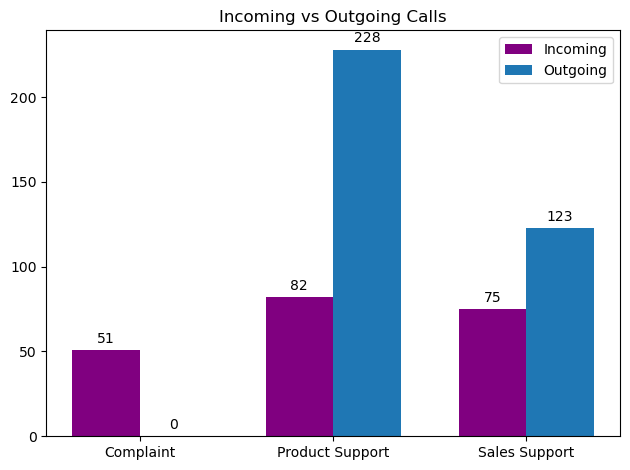

In [303]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
purpose_incoming = [51, 82, 75]
purpose_outgoing = [0, 228, 123]
#Your Code Here:

x = np.arange(len(call_purpose))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, purpose_incoming, width, label='Incoming', color = 'purple')
rects2 = ax.bar(x + width/2, purpose_outgoing, width, label='Outgoing')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Incoming vs Outgoing Calls')
ax.set_xticks(x, call_purpose)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: I'm not sure, south branch is a lot faster at answering calls but the service level percentage is a little bit lower. Based on that, I would say north branch, since they also have more calls abandoned



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: it seems like the south branch is working faster, but I'm not sure if adding more reps would increase the speed of other reps' work, so I'm not sure how to answer these questions based on the data... the numbers are all very close, so it almost seems like a significant result can't really be decided on, unless there's a way to decide that I don't know about. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: